In [1]:
from behav import load_behav, remove_fake_reps, load_data_dict, load_bidsbehav
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import pickle
import os

variables = ['Relative speed', 'Health loss', 'Max score', 'Completion prob', 'Completion speed']
subjects = ['sub01', 'sub02']
levels = ['1-0', '4-1', '5-0']
path_to_data = '/home/hyruuk/GitHub/neuromod/shinobi_data/'

aal


In [ ]:
### Copy correct files in a folder
import shutil
for filename in usable_filenames_all['sub01_1-0']:
    shutil.copyfile(filename, '/home/hyruuk/GitHub/neuromod/shinobi_data/data_ani/' + filename[52:])

sub-06_1


/home/hyruuk/anaconda3/envs/gymenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


sub-06_4


/home/hyruuk/anaconda3/envs/gymenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
/home/hyruuk/anaconda3/envs/gymenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


sub-06_5


/home/hyruuk/anaconda3/envs/gymenv/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/hyruuk/anaconda3/envs/gymenv/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/hyruuk/anaconda3/envs/gymenv/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/hyruuk/anaconda3/envs/gymenv/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/home/hyruuk/anaconda3/envs/gymenv/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


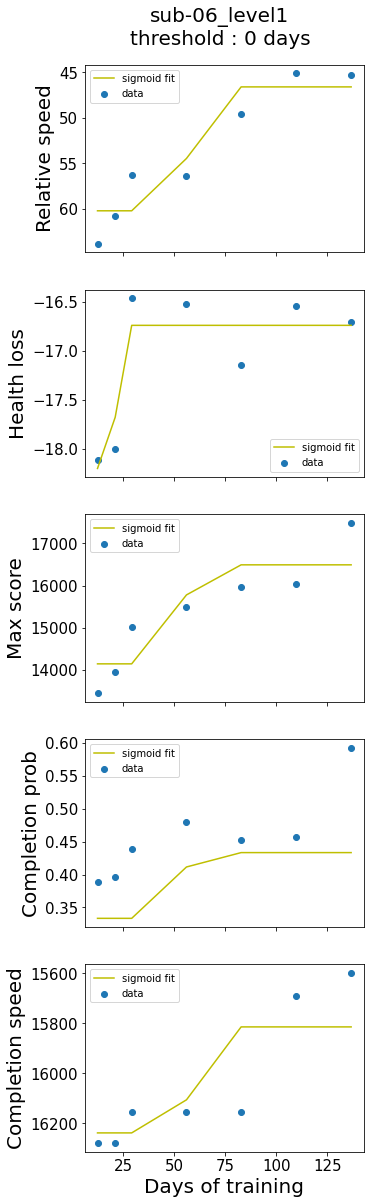

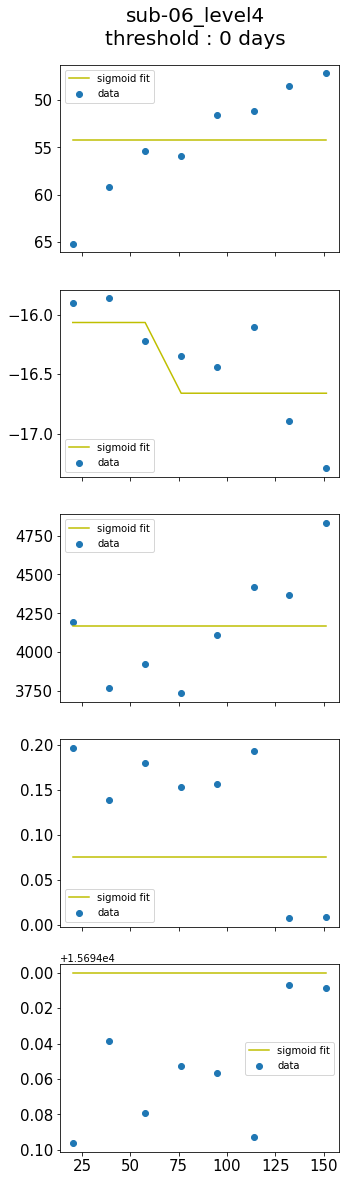

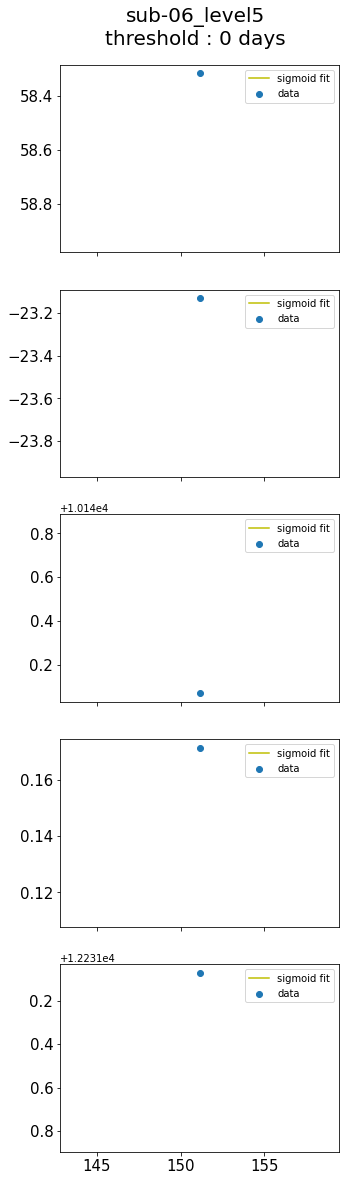

In [18]:
### Generate figs for bids subj-06

subj = 'sub-06'
level = '1'
plotlabels = True
levels=['1','4','5']
for level in levels:
    print('{}_{}'.format(subj, level))
    # Load data
    allvars = load_bidsbehav(path_to_data, subj, level)
    allvars = remove_fake_reps(allvars)
    data_dict = load_data_dict(allvars, path_to_data, subj, level, save=True, metric='mean')

    # Generate individual plots and obtain threshold
    fig, axes = plt.subplots(5, 1, figsize=(5,20))
    idx_thresh_all = []
    for idx, var in enumerate(variables):
        ax, idx_thresh = learning_curve(data_dict, 'Days of training', var, 
                                    zscore=False, plot=True, 
                                    x_jitter=1, y_jitter=0.1, ax=axes[idx], plotlabels=plotlabels, threshold = None)
        idx_thresh_all.append(idx_thresh)
    plotlabels = False
    median_thresh = idx_thresh_all[2]

    # Adjust overall plots
    for ax in fig.get_axes():
        ax.label_outer()
    fig.suptitle('{}_level{}\nthreshold : {} days'.format(subj, level, int(median_thresh)), y=0.92, fontsize=20)
    fig.savefig(path_to_data + '/{}_{}_learning_curve.tif'.format(subj, level), dpi=300, bbox_inches='tight')

In [66]:
len(allvars['filename'])

16

In [ ]:
allvars = load_bidsbehav(path_to_data, subj, level)
allvars = remove_fake_reps(allvars)

In [176]:
from behav import retrieve_variables

level = '1'
subj = 'sub-06'
path_to_data = '/home/hyruuk/GitHub/neuromod/shinobi_data/'
repetition = 0

# parameters
split_size = 0.2
min_dur = 1
FS = 60

allvars = load_bidsbehav(path_to_data, subj, level, save=True)
allvars = remove_fake_reps(allvars)

# init df list
all_df = []

# get the different possible actions
actions = list(allvars.keys())[2:14]
# generate events for each of them
for act in actions:
    var = allvars[act][repetition]
    all_df.append(generate_key_events(var, act, FR=FR))


# get the 
X_player_lists = fix_position_resets(allvars['X_player'])
time2pos_lists = compute_time2pos(X_player_lists)
distrib_t2p = distributions_t2p(time2pos_lists)
rel_speed = []
for run in time2pos_lists:
    rel_speed.append(compare_to_distrib(distrib_t2p, run))
# generate events
all_df.append(generate_relspeed_events(rel_speed[repetition], FR=FR, split_size=split_size, min_dur=min_dur))


# Merge all dfs
merged_df = pd.concat(all_df).sort_values(by='onset').reset_index(drop=True)


In [177]:
merged_df

,onset,duration,trial_type
0,0.150,98.366667,bad_perf
1,1.667,0.266000,RIGHT
2,2.450,0.267000,UP
3,3.100,0.233000,DOWN
4,3.783,0.484000,DOWN
...,...,...,...
320,200.800,0.350000,RIGHT
321,201.117,0.283000,UP
322,203.500,0.150000,B
323,203.717,0.150000,B


In [ ]:
from behav import remove_fake_reps
allvars_clean = remove_fake_reps(allvars)

In [ ]:
from behav import retrieve_variables
testfile = '/home/hyruuk/GitHub/neuromod/shinobi_data/sub02/5-0/ShinobiIIIReturnOfTheNinjaMaster-Genesis_Level5-0_p02_1599948075.bk2'
variables_lists = retrieve_variables([testfile], '1-0')

NameError: name 'env' is not defined

In [3]:
actions = list(allvars.keys())[2:14]

In [175]:

import pandas as pd
from behav import fix_position_resets, compute_time2pos, distributions_t2p, compare_to_distrib

FR = 60

def generate_key_events(var, key, FR=60):
    '''
    var = action variable, directly from allvars dict
    '''
    var_bin = [int(val) for val in var]
    diffs = list(np.diff(var_bin, n=1))
    presses = [round(i/FR, 3) for i, x in enumerate(diffs) if x == 1]
    releases = [round(i/FR, 3) for i, x in enumerate(diffs) if x == -1]
    onset = presses
    duration = [round(releases[i] - presses[i], 3) for i in range(len(presses))]
    trial_type = [key for i in range(len(presses))]
    events_df = pd.DataFrame(data={'onset':onset,
                                   'duration':duration,
                                   'trial_type':trial_type})
    return events_df

def generate_relspeed_events(var, FR=60, split_size=0.2, min_dur=1):
    '''
    var = list of pos_percentiles obtained with behav.compare_to_distrib()
    '''
    mask_IN = np.zeros(len(var))
    mask_OUT = np.zeros(len(var))

    for i, timestep in enumerate(var[1:-1]): # always keep the first and last value as 0 so diff will register the state transition
        if timestep/100 <= split_size:
            mask_IN[i+1] = 1
        if timestep/100 >= 1-split_size:
            mask_OUT[i+1] = 1

    diff_IN = np.diff(mask_IN, n=1)
    diff_OUT = np.diff(mask_OUT, n=1)

    durations_IN = np.array([i for i, x in enumerate(diff_IN) if x == -1]) - np.array([i for i, x in enumerate(diff_IN) if x == 1])
    durations_OUT = np.array([i for i, x in enumerate(diff_OUT) if x == -1]) - np.array([i for i, x in enumerate(diff_OUT) if x == 1])
    
    #build df
    onset = []
    duration = []
    trial_type = []
    for i, dur in enumerate(durations_IN):
        if dur >= (min_dur*FS):
            onset.append(np.array([i for i, x in enumerate(diff_IN) if x == 1])[i]/FR)
            duration.append(durations_IN[i]/FR)
            trial_type.append('good_perf')
    for i, dur in enumerate(durations_OUT):
        if dur >= (min_dur*FS):
            onset.append(np.array([i for i, x in enumerate(diff_OUT) if x == 1])[i]/FR)
            duration.append(durations_OUT[i]/FR)
            trial_type.append('bad_perf')

    events_df = pd.DataFrame(data={'onset':onset,
                                   'duration':duration,
                                   'trial_type':trial_type})
    return events_df
    
def generate_aps_events():
    return events_df

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [173]:
'''
var = list of pos_percentiles obtained with behav.compare_to_distrib()
'''
mask_IN = np.zeros(len(var))
mask_OUT = np.zeros(len(var))

for i, timestep in enumerate(var[1:-1]): # always keep the first and last value as 0 so diff will register the state transition
    if timestep/100 <= split_size:
        mask_IN[i+1] = 1
    if timestep/100 >= 1-split_size:
        mask_OUT[i+1] = 1

diff_IN = np.diff(mask_IN, n=1)
diff_OUT = np.diff(mask_OUT, n=1)

durations_IN = np.array([i for i, x in enumerate(diff_IN) if x == -1]) - np.array([i for i, x in enumerate(diff_IN) if x == 1])
durations_OUT = np.array([i for i, x in enumerate(diff_OUT) if x == -1]) - np.array([i for i, x in enumerate(diff_OUT) if x == 1])

#build df
onset = []
duration = []
trial_type = []
for i, dur in enumerate(durations_IN):
    if dur >= (min_dur*FS):
        onset.append(np.array([i for i, x in enumerate(diff_IN) if x == 1])[i]/FR)
        duration.append(durations_IN[i]/FR)
        trial_type.append('good_perf')
for i, dur in enumerate(durations_OUT):
    if dur >= (min_dur*FS):
        onset.append(np.array([i for i, x in enumerate(diff_OUT) if x == 1])[i]/FR)
        duration.append(durations_OUT[i]/FR)
        trial_type.append('bad_perf')

events_df = pd.DataFrame(data={'onset':onset,
                               'duration':duration,
                               'trial_type':trial_type})

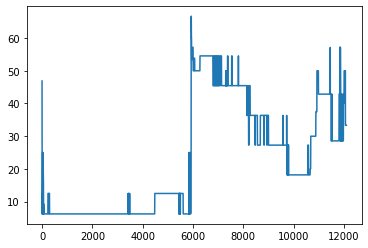

In [126]:
indices_IN = [i for i, x in enumerate(diff_IN) if x == -1]
indices_OUT = [i for i, x in enumerate(diff_OUT) if x == -1]
plt.plot(var)

In [70]:
### TODO :
## Either rel speed or derivative of rel speed


X_player_lists = fix_position_resets(allvars['X_player'])
time2pos_lists = compute_time2pos(X_player_lists)
distrib_t2p = distributions_t2p(time2pos_lists)
instant_perfs = []
for run in time2pos_lists:
    instant_perfs.append(compare_to_distrib(distrib_t2p, run))


'''
onset = presses
duration = [round(releases[i] - presses[i], 3) for i in range(len(presses))]
trial_type = [key for i in range(len(onset))]
events_df = pd.DataFrame(data={'onset':onset,
                               'duration':duration,
                               'trial_type':trial_type})
'''

"\nonset = presses\nduration = [round(releases[i] - presses[i], 3) for i in range(len(presses))]\ntrial_type = [key for i in range(len(onset))]\nevents_df = pd.DataFrame(data={'onset':onset,\n                               'duration':duration,\n                               'trial_type':trial_type})\n"

In [63]:
instant_perfs[12]

[]

In [60]:
allvars['filename']

['/home/hyruuk/GitHub/neuromod/shinobi_data/bids/sub-06/ses-001/beh/sub-06_ses-001_task-shinobi_level-1_rep-001_gamedata.bk2',
 '/home/hyruuk/GitHub/neuromod/shinobi_data/bids/sub-06/ses-002/beh/sub-06_ses-002_task-shinobi_level-1_rep-001_gamedata.bk2',
 '/home/hyruuk/GitHub/neuromod/shinobi_data/bids/sub-06/ses-002/beh/sub-06_ses-002_task-shinobi_level-1_rep-002_gamedata.bk2',
 '/home/hyruuk/GitHub/neuromod/shinobi_data/bids/sub-06/ses-002/beh/sub-06_ses-002_task-shinobi_level-1_rep-003_gamedata.bk2',
 '/home/hyruuk/GitHub/neuromod/shinobi_data/bids/sub-06/ses-003/beh/sub-06_ses-003_task-shinobi_level-1_rep-001_gamedata.bk2',
 '/home/hyruuk/GitHub/neuromod/shinobi_data/bids/sub-06/ses-003/beh/sub-06_ses-003_task-shinobi_level-1_rep-002_gamedata.bk2',
 '/home/hyruuk/GitHub/neuromod/shinobi_data/bids/sub-06/ses-003/beh/sub-06_ses-003_task-shinobi_level-1_rep-003_gamedata.bk2',
 '/home/hyruuk/GitHub/neuromod/shinobi_data/bids/sub-06/ses-003/beh/sub-06_ses-003_task-shinobi_level-1_rep-004

## time2pos

In [ ]:
### compute percentile and plot
pos_percentile = compare_to_distrib(distrib_t2p, time2pos_lists[-69])
plt.plot(pos_percentile)



In [ ]:
from scipy import signal
import numpy as np

# plot individual run against distrib of all runs
pos_percentile = compare_to_distrib(distrib_t2p, time2pos_lists[-69])
plt.plot(pos_percentile)

# same but filtered
b, a = signal.butter(3,0.005)
pos_filtered = signal.filtfilt(b, a, pos_percentile)
plt.plot(pos_filtered)

# same but differentiated, in order to get "instantaneous" performance
pos_derived = np.diff(pos_filtered, n=1)
plt.plot(pos_derived)

# Deprecated


All these functions were used troughout the development of this notebook but are useless/replaced since.
I saved them here for posterity
(... or in case I need to get back to them for some reason.)

In [ ]:
### load the files and extract the variable
def retrieve_variable(files, variable):
    '''
    files : list of files with complete path
    variable : name of variable to get
    
    variable_lists : list of arrays of length corresponding to the number of frames in each run
    '''
    env = retro.make('ShinobiIIIReturnOfTheNinjaMaster-Genesis', state='Level'+level)
    variable_lists = []
    for file in files:
        variable_list = []
        key_log = retro.Movie(file)
        env.reset()
        while key_log.step():
            a = [key_log.get_key(i, 0) for i in range(env.num_buttons)]
            _,_,_,i = env.step(a)
            variable_list.append(i[variable])
        variable_lists.append(variable_list)
    return variable_lists

def retrieve_X_player_lists(files):
    
    env = retro.make('ShinobiIIIReturnOfTheNinjaMaster-Genesis', state='Level'+level)
    
    X_player_lists = []

    for file in files:

        X_player_list = []

        key_log = retro.Movie(file)

        env.reset()

        while key_log.step():

            a = [key_log.get_key(i, 0) for i in range(env.num_buttons)]
            _,_,_,i = env.step(a)

            X_player_list.append(i['X_player'])

        X_player_lists.append(X_player_list)
        
    return X_player_lists

def save_X_player_list(subject, level, path_to_data):
    files = sorted(glob(path_to_data + subject + '/' + level + '/ShinobiIIIReturnOfTheNinjaMaster-Genesis_Level' + level + '*'))
    X_player_lists = retrieve_X_player_lists(files)
    X_player_lists = fix_position_resets(X_player_lists)
    X_lists_path = op.join(path_to_data, '{}_{}_X_player.mat'.format(subject, level))
    with open(X_lists_path, 'wb') as f:
        pickle.dump(X_player_lists, f)
    
def load_X_player_list(subject, level, path_to_data):
    X_lists_path = op.join(path_to_data, '{}_{}_X_player.mat'.format(subject, level))
    with open(X_lists_path, 'rb') as f:
        X_player_lists = pickle.load(f)
    return X_player_lists
    
def fit_and_retrieve_coefficients(X_player_lists):
    
    coef_X_player_lists = []
    
    for X_player_list in X_player_lists:
        
        x = np.arange(len(X_player_list)).reshape(-1, 1)
        y = np.array(X_player_list).reshape(-1, 1)
        
        reg = LinearRegression().fit(x,y)
        coef = reg.coef_
        
        coef_X_player_lists.append(float(coef))
        
    return coef_X_player_lists

def compute_moving_variance(coef_X_player_lists):
    
    moving_variance = []
    
    for i in range(len(coef_X_player_lists)-9):
        moving_variance.append(np.var(coef_X_player_lists[i:i+10]))
        
    return moving_variance

def print_lists_and_corresponding_files(files, lists):
    
    for i in range( len(files) ):
        print(lists[i],'\n', files[i],'\n\n')

X_player_lists = retrieve_X_player_lists(files)
X_player_lists = fix_position_resets(X_player_lists)
coef_X_player_lists = fit_and_retrieve_coefficients(X_player_lists)
moving_variance = compute_moving_variance(coef_X_player_lists)
plt.plot(moving_variance)

